In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import decomposition

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,confusion_matrix,classification_report

#Data pre-processing

In [9]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                350 non-null    object 
 1   radius_mean              350 non-null    float64
 2   texture_mean             350 non-null    float64
 3   perimeter_mean           350 non-null    float64
 4   area_mean                350 non-null    float64
 5   smoothness_mean          350 non-null    float64
 6   compactness_mean         350 non-null    float64
 7   concavity_mean           350 non-null    float64
 8   concave points_mean      350 non-null    float64
 9   symmetry_mean            350 non-null    float64
 10  fractal_dimension_mean   350 non-null    float64
 11  radius_se                350 non-null    float64
 12  texture_se               350 non-null    float64
 13  perimeter_se             350 non-null    float64
 14  area_se                  3

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,15.78,17.89,103.60,781.0,0.09710,0.1292,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480
1,M,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
2,M,15.85,23.95,103.70,782.7,0.08401,0.1002,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287
3,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,...,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
4,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.2303,...,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


##EDA

In [19]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [21]:
df.corr()['diagnosis'].sort_values()

fractal_dimension_mean    -0.077216
smoothness_se             -0.063747
symmetry_se               -0.015972
texture_se                 0.016048
fractal_dimension_se       0.099189
fractal_dimension_worst    0.289079
compactness_se             0.294351
smoothness_mean            0.315894
symmetry_mean              0.360210
concavity_se               0.369430
smoothness_worst           0.380192
concave points_se          0.410177
texture_mean               0.428739
symmetry_worst             0.429327
texture_worst              0.476853
perimeter_se               0.571146
compactness_mean           0.573521
area_se                    0.577879
compactness_worst          0.586785
radius_se                  0.588181
concavity_worst            0.687021
concavity_mean             0.712274
area_mean                  0.735851
area_worst                 0.751407
radius_mean                0.754973
perimeter_mean             0.765481
concave points_mean        0.772364
concave points_worst       0

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,15.78,17.89,103.60,781.0,0.09710,0.1292,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480
1,1,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
2,1,15.85,23.95,103.70,782.7,0.08401,0.1002,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287
3,1,13.73,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,...,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
4,1,14.54,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.2303,...,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,350.0,0.371429,0.483878,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,350.0,14.190789,3.562550,6.981000,11.682500,13.475000,16.090000,28.11000
texture_mean,350.0,19.380629,4.470252,10.720000,16.237500,18.895000,21.710000,39.28000
perimeter_mean,350.0,92.365429,24.534132,43.790000,74.790000,87.200000,106.100000,188.50000
area_mean,350.0,661.312857,354.644841,143.500000,419.100000,560.100000,797.400000,2499.00000
smoothness_mean,350.0,0.096578,0.014049,0.052630,0.086740,0.096010,0.105250,0.16340
compactness_mean,350.0,0.103444,0.051117,0.026500,0.066090,0.094975,0.129650,0.31140
concavity_mean,350.0,0.087218,0.078720,0.000000,0.028973,0.059285,0.130725,0.42680
concave points_mean,350.0,0.048694,0.038628,0.000000,0.019787,0.033950,0.074670,0.20120
symmetry_mean,350.0,0.180690,0.027056,0.106000,0.161925,0.178400,0.195225,0.30400


In [24]:
df['diagnosis'].value_counts(normalize=True)

0    0.628571
1    0.371429
Name: diagnosis, dtype: float64

In [25]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

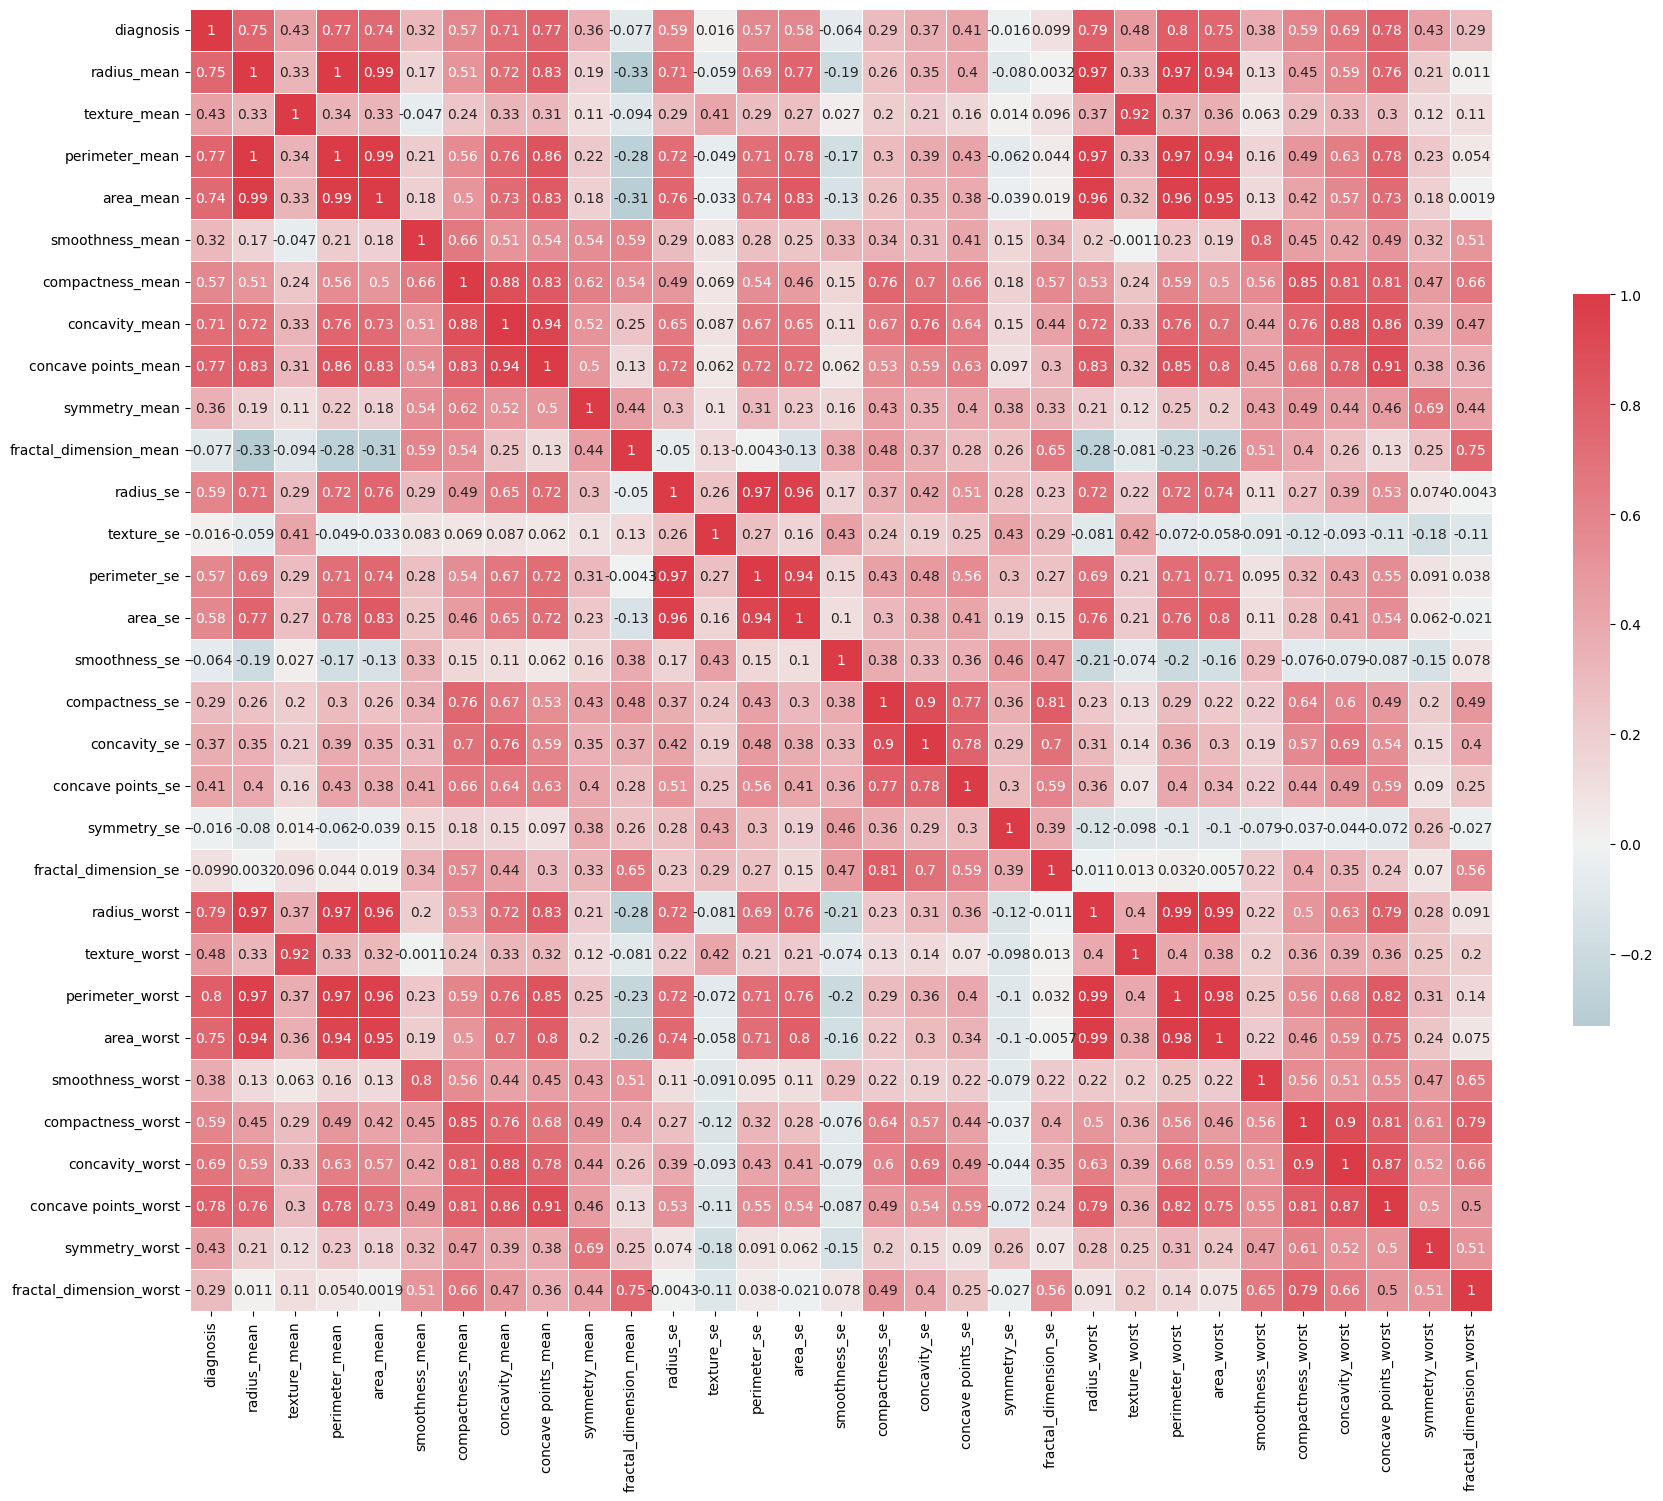

In [26]:
f, ax = plt.subplots(figsize=(21, 19))

sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##PCA

In [28]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

Projecting 30-dimensional data to 2D


<ipython-input-29-60079464569e>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted');


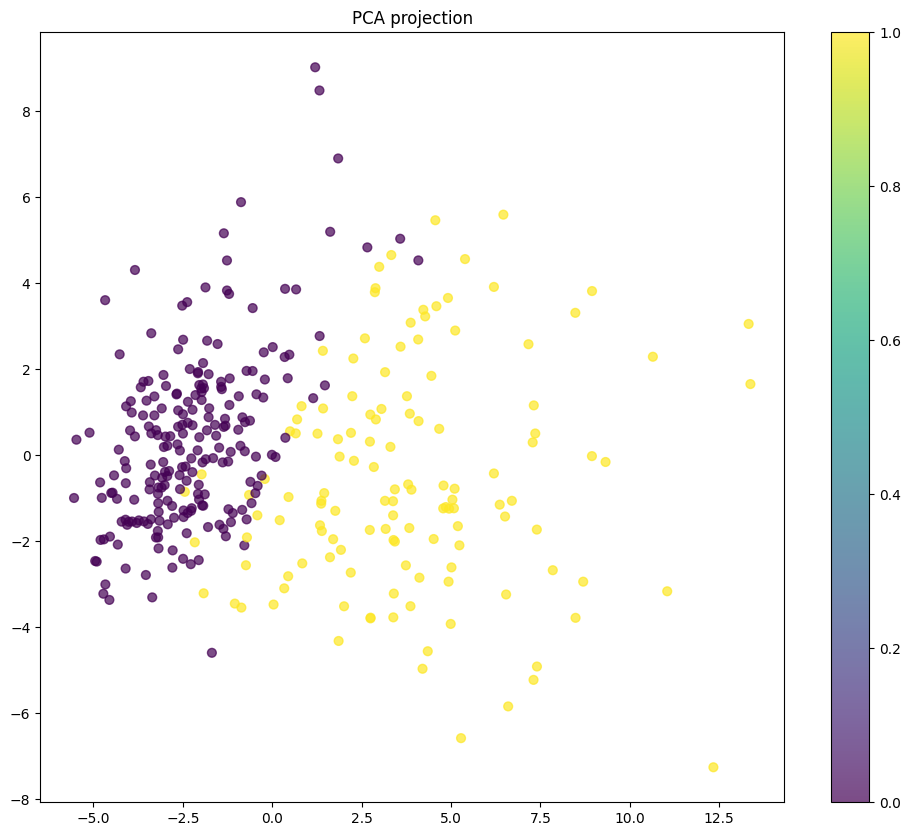

In [29]:
X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

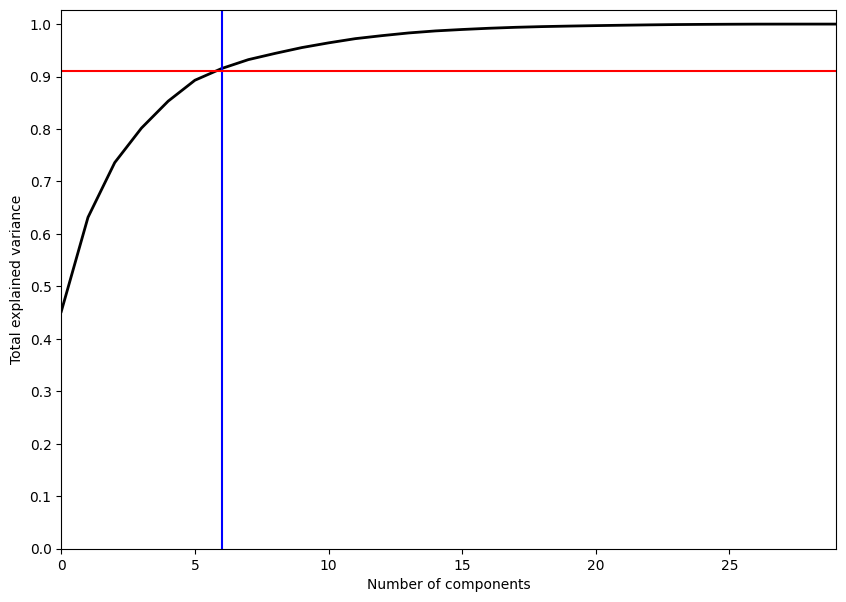

In [30]:
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

##Normalization

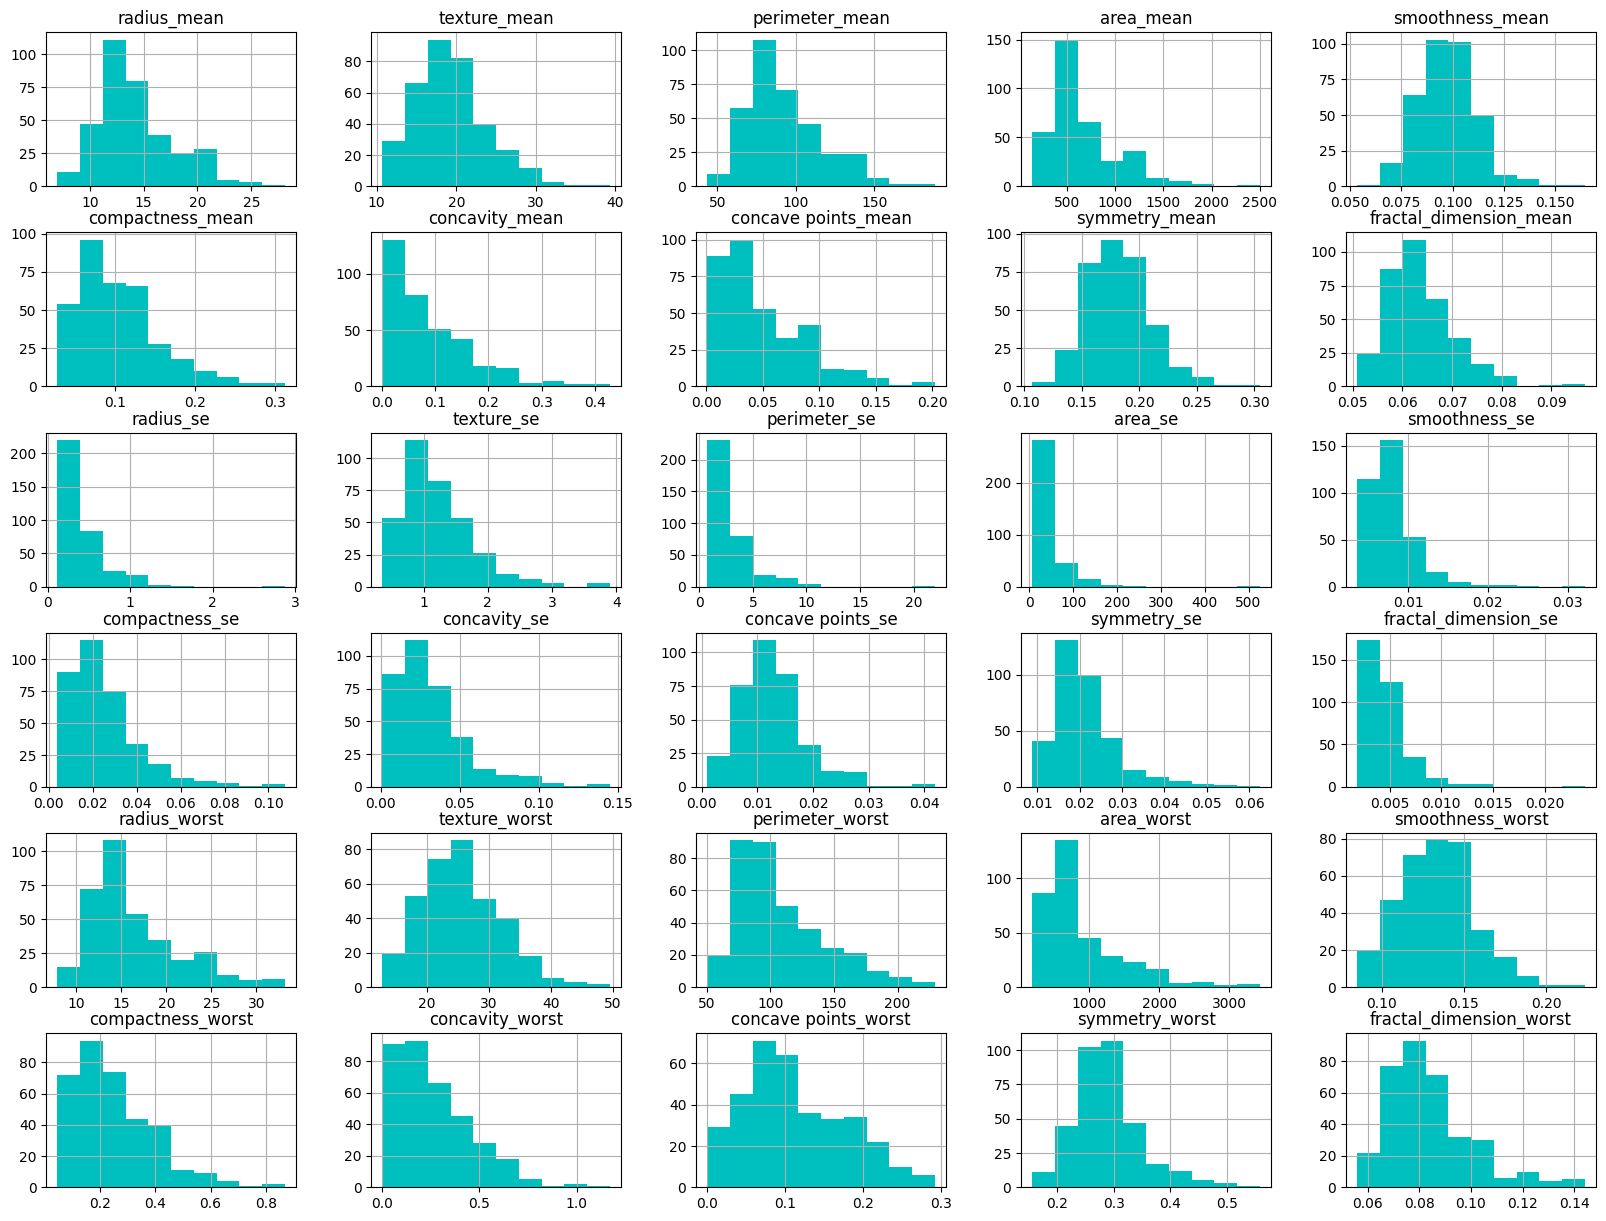

In [31]:
X = df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

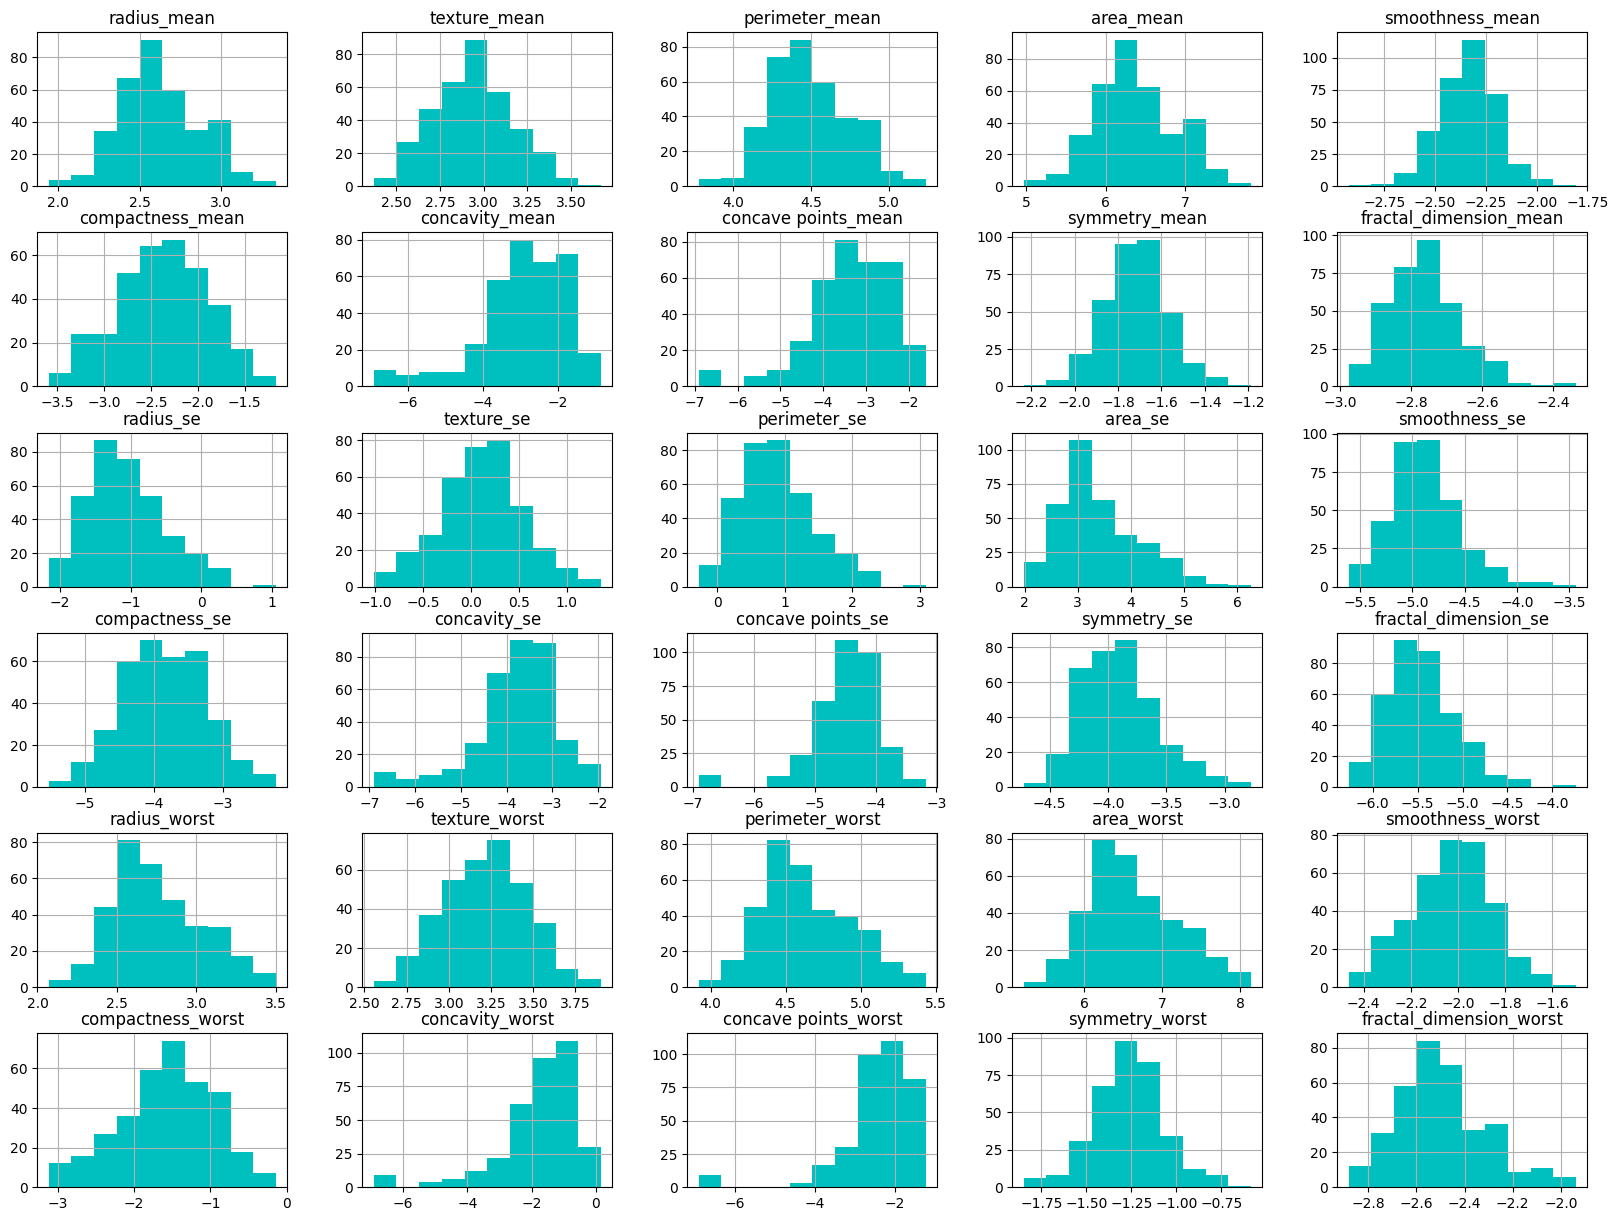

In [32]:
X = df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model

##Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print("---------------------------------------------------------------------------------")
print(f"Classification Report: \n {classification_report(y_test,y_pred)}\n\n\n")
print("---------------------------------------------------------------------------------")
print(f"Accuraccy Precent: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix: 
 [[57  2]
 [ 0 46]]



---------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.96      1.00      0.98        46

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105




---------------------------------------------------------------------------------
Accuraccy Precent: 
 98.09523809523809





##kNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print("---------------------------------------------------------------------------------")
print(f"Classification Report: \n {classification_report(y_test,y_pred)}\n\n\n")
print("---------------------------------------------------------------------------------")
print(f"Accuraccy Precent: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix: 
 [[59  0]
 [ 3 43]]



---------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.93      0.97        46

    accuracy                           0.97       105
   macro avg       0.98      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105




---------------------------------------------------------------------------------
Accuraccy Precent: 
 97.14285714285714





##SVM

In [54]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [55]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print("---------------------------------------------------------------------------------")
print(f"Classification Report: \n {classification_report(y_test,y_pred)}\n\n\n")
print("---------------------------------------------------------------------------------")
print(f"Accuraccy Precent: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix: 
 [[58  1]
 [ 0 46]]



---------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        46

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105




---------------------------------------------------------------------------------
Accuraccy Precent: 
 99.04761904761905



